In [1]:
!pip install pydicom

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pydicom
import os
import numpy as np
from matplotlib import pyplot, cm
from scipy.sparse import csr_matrix

## Listing DICOM files from directory 

In [15]:
data_path = "../data/"
lstFilesDCM = []  # create an empty list
i=0
for dirName, subdirList, fileList in os.walk(data_path):
    for filename in fileList:
        i+=1
        if (".dcm" in filename.lower()):  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

## Reading Dimensions 

In [16]:
len(lstFilesDCM)

25684

In [17]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

#print(RefDs.pixel_array)

# # Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

print(ConstPixelDims)

# # Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(1))

(1024, 1024, 25684)


In [18]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

print(RefDs.pixel_array.dtype)
print(csr_matrix((1024,1024), dtype=np.int8).toarray())

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Reading Dicom files and converting them to an image matrix 

     1 Files


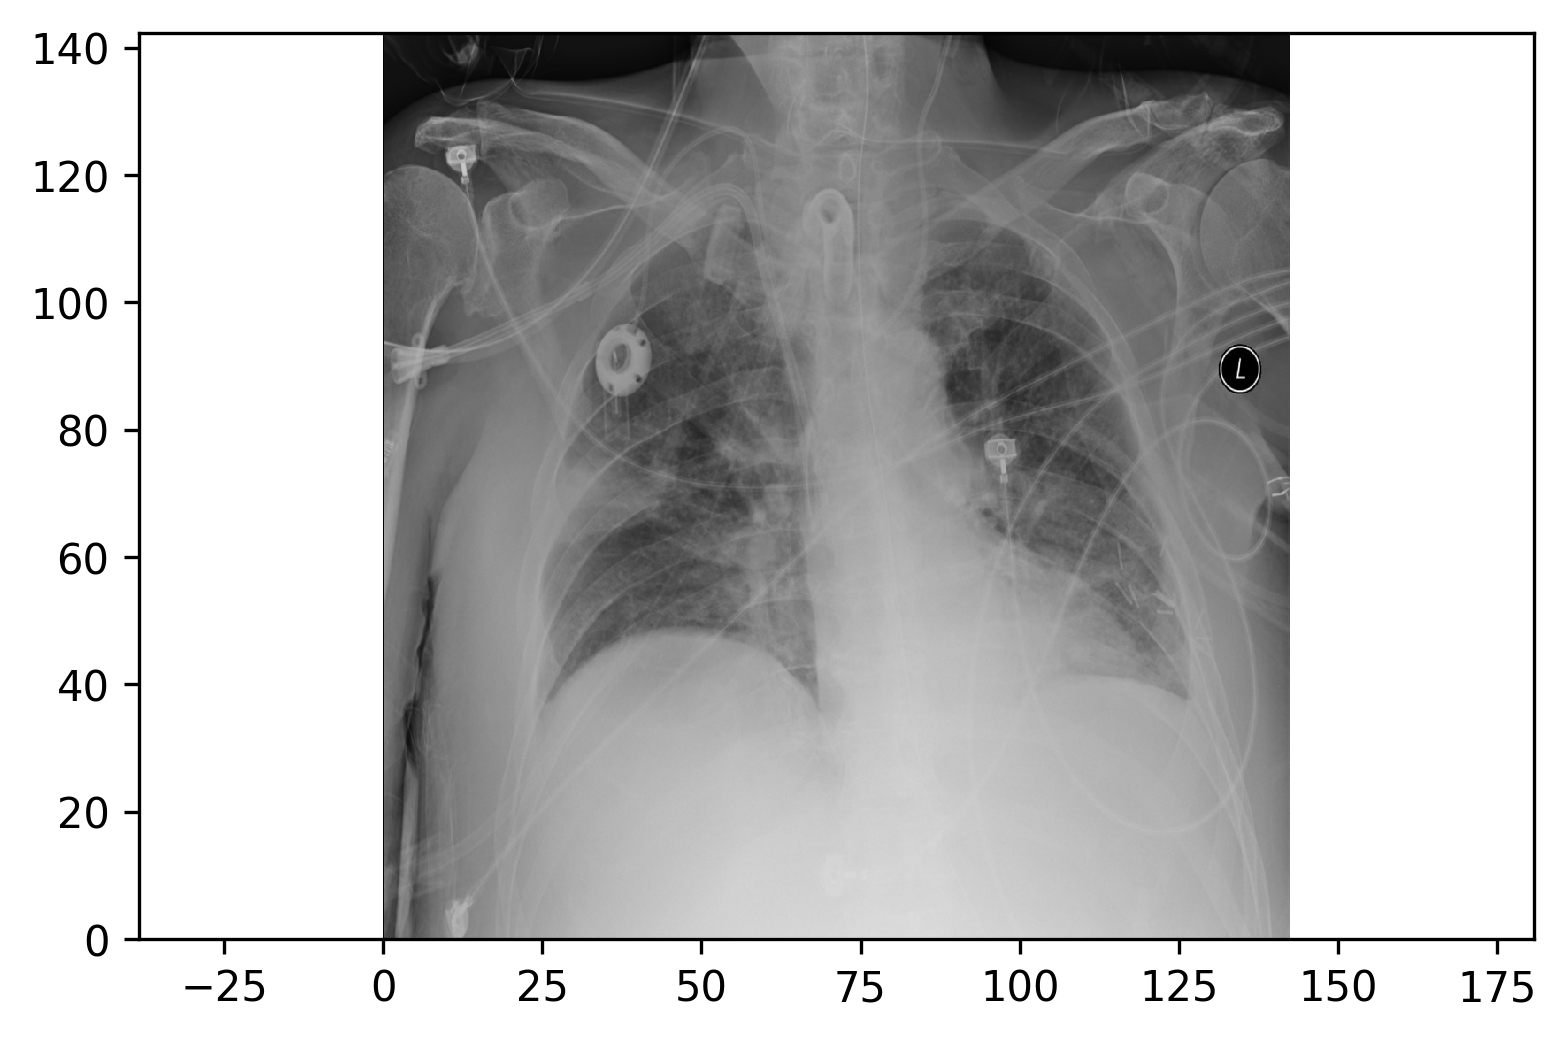

../data/99044471-c350-4012-a05f-b7594182185a.png
   101 Files
   201 Files
   301 Files


In [ ]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
i = 0
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    img_dicom = ds.pixel_array     
    img_path = filenameDCM.replace('dcm', 'png')
    img_matrix = np.flipud(img_dicom)
    img = PIL.Image.fromarray(np.uint8(img_matrix))
    img.save(img_path)
    
    if (i % 100 == 0):
        print("{:6d} Files".format(i+1))
    
    if (i%1000 == 0):        
        pyplot.figure(dpi=300)
        pyplot.axes().set_aspect('equal', 'datalim')
        pyplot.set_cmap(pyplot.gray())
        pyplot.pcolormesh(x, y, img)
        pyplot.show()
        print(img_path)    
    
    i+=1  
